# BINGO Hackaton - Lecture 04

**Luciano Barosi**

*BINGO Collaboration*



## Supernovas

In [1]:
#Point syspath to find out lessons module
import os
import sys
sys.path.append('/home/cosmos/code/cosmos/lessons/')

In [6]:
# Import the supernova lesson
from Supernova import Supernova
#Fix the size of the images for matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Define nice figure size for MatplotLib
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbfc0106e48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbfc0141588>)

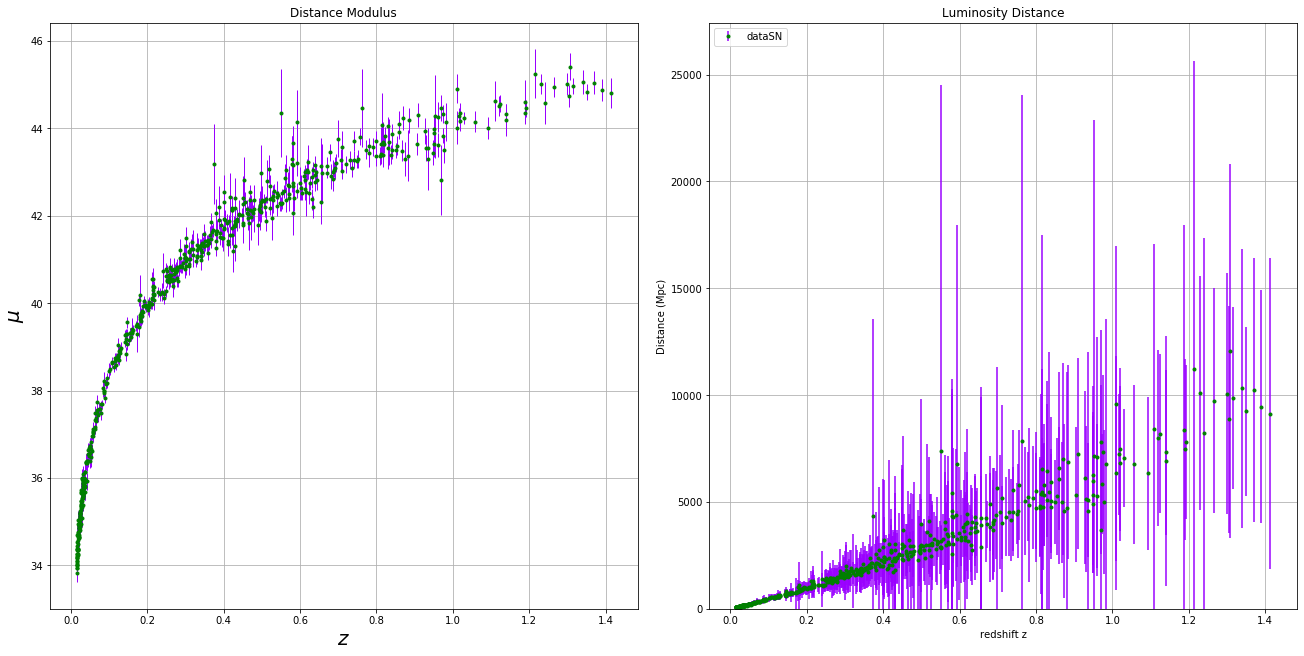

In [7]:
# Instantiate the Supernova class to fetch the data
SN = Supernova()
SN.plotDataToZ()

This data show that the expansion of the Universe is accelerated. Let's see how in this lesson.

First, we should take a look at data for low-z, where we expect to recover Hubble law.

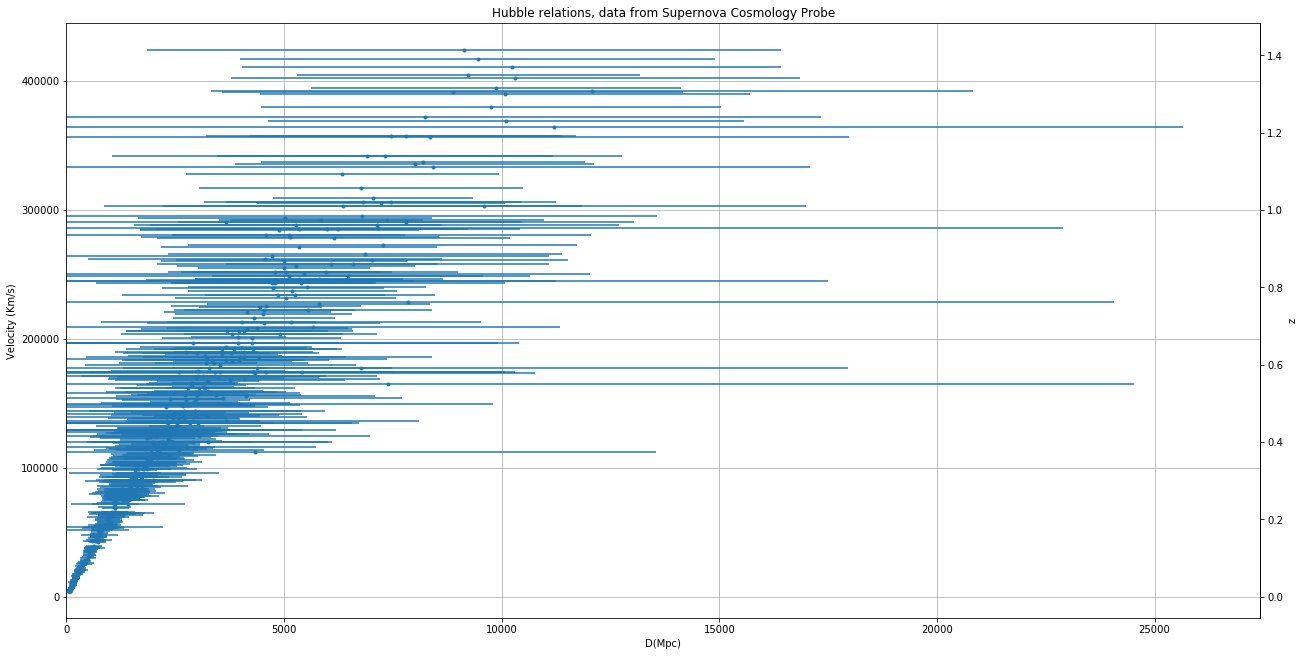

In [8]:
SN.hubbleDiagram()

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbfc022d240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbfc01d8710>)

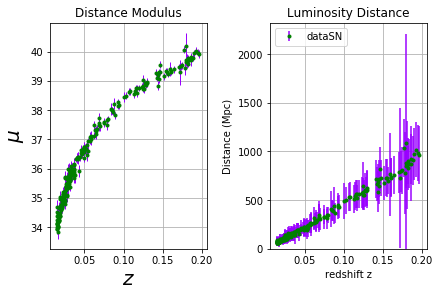

In [5]:
SN.plotDataToZ(0.2)

### Distance Modulus and Magnitude
$$\mu = m - M $$ 
$$\mu = 5 (\mathrm{Log}_{10}(d) - 1)$$
**Distances are measured in parsec**

**Absolute magnitude: 10 pc**
Let's show the plot with distances.

These diagrams will not only show us the value of the Hubble constant, it will also tell us something about the composition of the universe.

Distance in a (4D)-curved universe is not so trivial.

At least once in your life you should consider a Homogeneous and Isotropic model of the Universe, i.e., a FRW metric:
$$ds^2 = -dt^2 + a²(t)\left[dr^2 + r^2d\Omega^2 \right] $$
where we assumed the universe spatially flat.
Plug this in the Einstein equation:
$$ R_{\mu\nu}-\frac{1}{2}g_{\mu\nu}R = 8\pi GT_{\mu\nu}$$
and consider the universe to be filled by componentes such that
$$T_{\mu\nu}= \rho u_\mu u_\nu + P (g_{\mu\nu} + u_\mu u_\nu) $$
with the four-velocity given by 
$$u^\mu = (1,0,0,0)$$
You will find the Hubble ,the acceleration and the continuity equation:
$$ H^2 =\frac{8 \pi G}{3}\rho$$
$$\dot \rho + 3 H (\rho + P) = 0$$
$$\frac{\ddot a}{a} = -\frac{-4\pi G}{3}(\rho + 3P)$$

Defining the critical density of the universe:
$$\rho_c = \frac{3 {H_0}^2}{8\pi G}$$
we may write the friedmann equation in terms of the density parameter for the components of the universe. We will consider a Universe filled with cold dar matter and cosmological constant, neglecting curvature and radiation contribution.
$$ \frac{H^2}{{H_0}^2} =  \Omega_\Lambda + \Omega_M $$
Comoving distance may be read from the metric line element (re-inerting the c factors):
$$\chi = \int_{t_em}^{t_0} \frac{c dt}{a(t)} = \int_a^1 \frac{c da}{H a^2} $$

Luminosity distance should take into account how radiation propagates and the energy loss due to redshift:

$$ d_L = (1+z)\chi$$

Using the Friedmann equation we may write integral expressions for the distances and change the integration variable to z:
$$d_L = (1+z) \frac{c}{H_0} \int_0^z \frac{dz}{\sqrt{\Omega_M (1+z)^3 + \Omega_\Lambda}}$$
and the flat universe means that $$\Omega_\Lambda + \Omega_M = 1$$

For low z we may expand:
$$ {d_L}^{(1)} = \frac{c z}{H_0} $$
$$ {d_L}^{(2)} = \frac{c z}{H_0} \left( 1 + \frac{1-q_0}{2} z \right)$$

The term $c z$ is the recession speed and the result above represents Hubble Law as originally imagined.
$$q_0 = \frac{1}{2}\Omega_M + \Omega_\Lambda = \frac{3}{2}\Omega_M -1 $$

We may fit the data with the Hubble linear model, the quadratic model and the flat FRW model. 

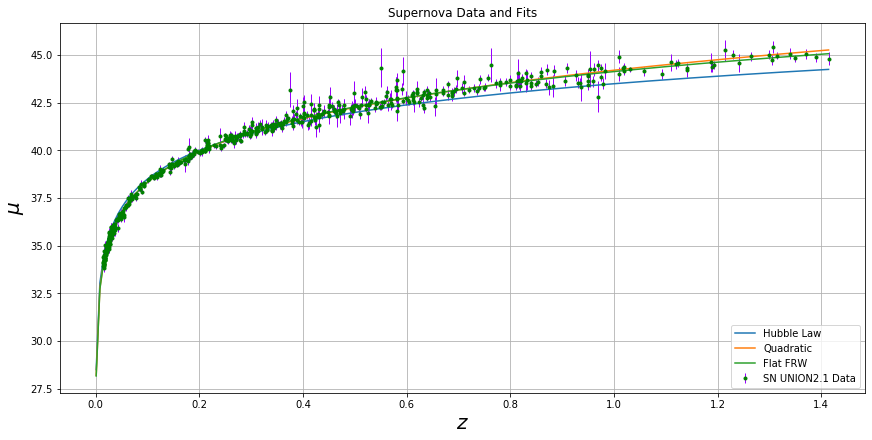

In [13]:
SN.plotFitZ()

By simply looking at the graph above we see that linear Hubble model breaks for large z. If $q$ is negative we have an accelerating universe.

In [22]:
print("Hubble Constant: Linear Model = ", 
      SN.fitDataMu(FIT = "HUBBLE", ZMAX = 0.1)[0].tolist())
print("Quadratic Model Parameters= ", 
      SN.fitDataMu(FIT = "QUADRATIC")[0].tolist())
print("flatFRW Model Parameters= ", 
      SN.fitDataMu(FIT = "FRW")[0].tolist())

Hubble Constant: Linear Model =  [67.93773971741543]
Quadratic Model Parameters=  [68.77896832531395, -2.1748096937675676]
flatFRW Model Parameters=  [70.00241539765383, 0.2776122297701926]


We should check the goodnedd of the fit in order to assess if we really ruled out linear model and ruled in quatratic model.

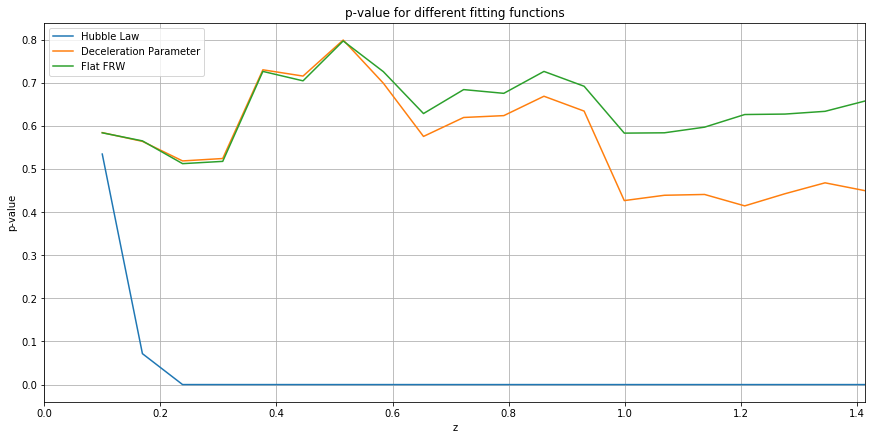

In [23]:
SN.plotPvalues()

## Exercises

### Exercise 1
Plot the 5 $\sigma$ confidence interval for the fits.

### Exercise 2
Find the range of $z$ that allows us to ruled out linear hubble model with 99.9% confidence.

### Exercise 3
Create a function to plot the fits in a plot with luminosity distance in the vertical axis, with confidence interval of 5 $\sigma$

### Exercise 4
The function to compute FRW distance is not efficient and not vectorized. Implement a function that takes a numpy array as argument for z. (Hint: use scipy.odeint)

### Exercise 5:
Remove the constraint of flatness and consider $\Omega_\Lambda$ and $\Omega_M$ to be independent. Choose $H$ from your best fit and try to construct a 2d heatmap, axis being the density parameters and color being the $\chi^2$ of the fit for each set of parameters. 

### Exercise 6:
**Take a look at the code of the module and fix some of its problems.**
Rewrite the function that fits the data to accept a list of fits types.
Generalize this function to accept different kinf od fits.
The function may take the initial parameters of the fit as arguments.
Try writing some functions repeating less code.
